In [ ]:
=========================================== Question 5 ==========================================================

In [45]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
%matplotlib inline
np.seterr(divide='ignore');

In [46]:
# Dynamics function
def Dynamics(t, z):
    '''Input:
        z[0] = x(t)
        z[1] = x'(t)
        z[2] = y(t)
        z[3] = y'(t)
        
       Output is time derivative: 
       dx/dt = Vx (constant horizontal velocity)
       dy/dt = z[2] (i.e., y')
       dy'/dt = -9.81 (gravity)
    '''
    z1=z[1]
    z2=(-10 * (z[0] - 0.5) ) /( (z[0]-0.5)**2 + (z[2]-0.5)**2 )**0.5 
    z3=z[3]
    z4= (-10 * (z[2] - 0.5) ) /( (z[0]-0.5)**2 + (z[2]-0.5)**2 )**0.5 
    # Vx is defined globally
    return [z1,z2,z3,z4]

In [3]:
# IVP parameters
tspan = [0, 10]
y0 = [0,1.77,0,-1.77]


In [27]:
# Call the numerical solver
sol = solve_ivp(Dynamics,tspan,y0,max_step=0.1) # try adding max_step=1

In [30]:
len(sol.t)

104

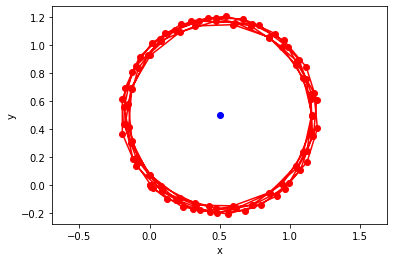

In [38]:
# Plot the solution
plt.plot(sol.y[0], sol.y[2], 'ro-');
plt.plot(0.5,0.5,'bo')

plt.axis('equal')
plt.xlabel('x'); plt.ylabel('y');

======================================With Drift========================================

In [39]:
# Dynamics function
def Dynamics(t, z):
    '''Input:
        z[0] = x(t)
        z[1] = x'(t)
        z[2] = y(t)
        z[3] = y'(t)
        
       Output is time derivative: 
       dx/dt = Vx (constant horizontal velocity)
       dy/dt = z[2] (i.e., y')
       dy'/dt = -9.81 (gravity)
    '''
    z1=z[1]
    z2=( (-10 * (z[0] - 0.5) ) /( (z[0]-0.5)**2 + (z[2]-0.5)**2 )**0.5 ) + (0.25*np.sin(t*np.pi))
    z3=z[3]
    z4= ( (-10 * (z[2] - 0.5) ) /( (z[0]-0.5)**2 + (z[2]-0.5)**2 )**0.5 )
    # Vx is defined globally
    return [z1,z2,z3,z4]

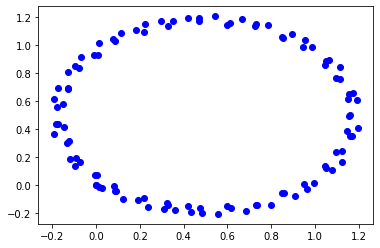

In [48]:
# Call the numerical solver
sol2 = solve_ivp(Dynamics,tspan,y0) # try adding max_step=1
x = sol.y[0]
y = sol.y[2]
plt.plot(sol.y[0], sol.y[2], 'bo');

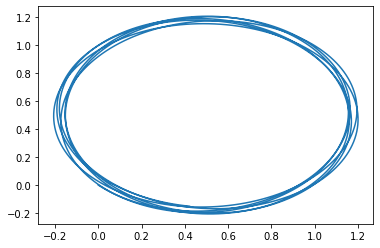

In [53]:
t = sol.t

xspline = make_interp_spline(t,x)
yspline = make_interp_spline(t,y)
tt = np.linspace(t[0],t[-1],1000)

#feed tt (t-values) into the spline functions to get x,y coordinates
xt = xspline(tt)
yt = yspline(tt)

#graph x,y coordinates
plt.plot(xt,yt)